In [8]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
#data = pd.DataFrame(ProductionTank) 
# Count the unique materialsProductionTank produced by each tank
Batch_counts =ProductionTank.groupby('Tank_1')['BATCHID'].nunique().reset_index()
print(Batch_counts)


      Tank_1  BATCHID
0       2202       24
1       2203       25
2       2204       24
3       2205       27
4       2302       57
5       2303       57
6       2304       48
7       2305       57
8       2501       51
9       2502       49
10      2503       97
11      2504       99
12      2601       43
13      2603       36
14      2604       28
15  U_22MT01       37
16  U_23MT01       58
17  U_26MT02       32


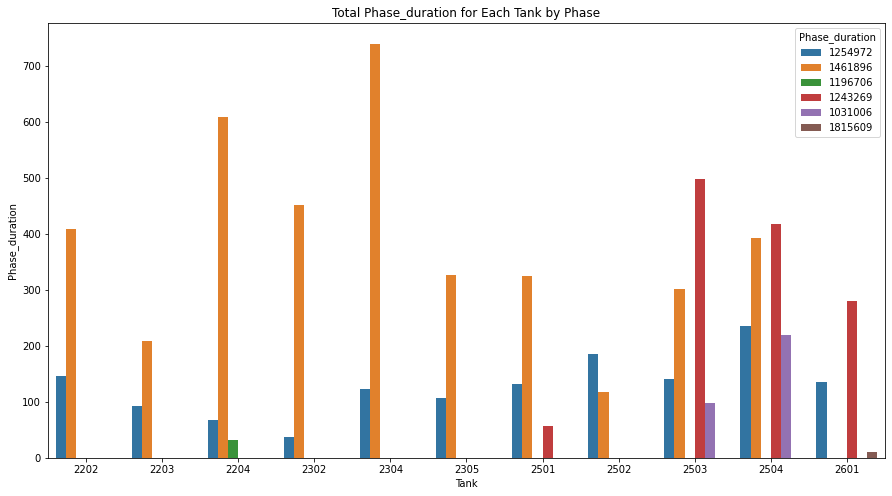

In [12]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
#specific_tanks = ['2202', '2203', '2204','2205']

specific_tanks = ['2202','2203','2204','2302','2304','2305','2501','2502','2503','2504','2601']

# Filter the dataframe for desired instruction steps
INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

filtered_data = data[(data['INGRED_ID'].isin(INGRED_ID)) & (data['Tank_1'].isin(specific_tanks))]

#INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration',hue='INGRED_ID', ci=None)
plt.title('Total Phase_duration for Each Tank by Phase')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Phase_duration')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_total_durations_df2)




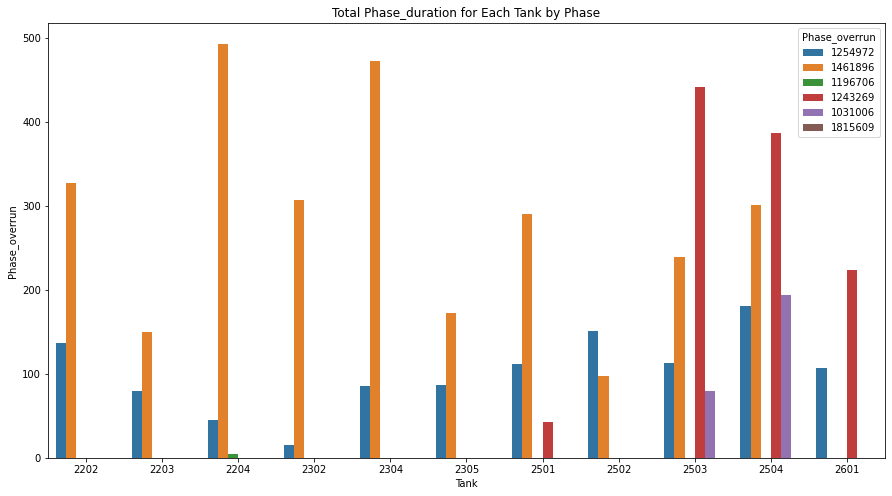

In [13]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)
#specific_tanks = ['2202', '2203', '2204','2205']

specific_tanks = ['2202','2203','2204','2302','2304','2305','2501','2502','2503','2504','2601']

# Filter the dataframe for desired instruction steps
INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

filtered_data = data[(data['INGRED_ID'].isin(INGRED_ID)) & (data['Tank_1'].isin(specific_tanks))]

#INGRED_ID = ['1461896','1254972','1031006','1243269','1815609','1196706']

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material','INGRED_ID'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun',hue='INGRED_ID', ci=None)
plt.title('Total Phase_overrun for Each Tank by Phase')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Phase_overrun')
plt.show()

#Aggregate data per tank
aggregated_total_durations_df2 = filtered_data.groupby(['Tank_1','BATCHID']).agg({
  #  'BATCHID': 'count',
    # 'Material': 'count',
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_total_durations_df2)




Text(0, 0.5, 'Phase_overrun')

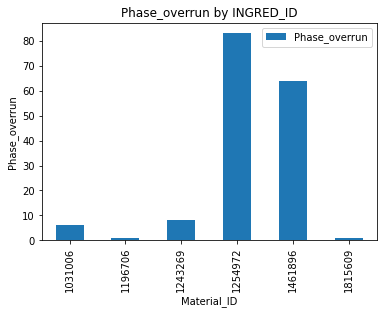

In [15]:
# uploaded_df

total_durations[['Phase_overrun','INGRED_ID']].groupby(by='INGRED_ID').count().plot.bar()
#plt.figure(figsize=(10, 6))
plt.title('Phase_overrun by INGRED_ID')
plt.xlabel('Material_ID')
plt.ylabel('Phase_overrun')
#plt.xticks(rotation = 90)
#plt.show()

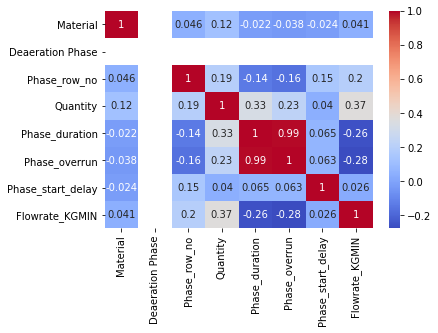

In [17]:
# Correlation heatmap to visualize correlation between numeric variables
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
correlation_matrix = filtered_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()